In [22]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.io import loadmat
import sys, os
from utils import *
import math
%matplotlib inline


## Building Models of Spike Train Data

### _Overview_
#### In this tutorial, we will be analyzing the firing activity of a retinal ganglion cell in cuture, exposed to low-light and high-light  environments. The aims of the tutorial follow:

* To visualize spike-train data
* To compute and interpret summary statistics
* To build models of the inter-spike-interval distribution as a function of the light level
* To use these models to interpret new data

### Background

#### The scientific question at hand

Neurons in the retina respond to patterns of light. When retinal ganglion cells are grown in culture and held under constant environmental conditions, these neurons exhibit spontaneous firing activity. A researcher extracted the retina from goldfish and sustained them in culture and performed electrophysiological recordings under two conditions: low ambient light levels and high ambient light levels. The aim of the study was to characterize the variability of the goldfish ganglion cell firing due to the common noise source, the background light level. [1]


### Theory
#### Neural spike trains as point processes
  



#### Point Process Representations

A point process can be represented either by the event times or the inter-event times

#### Point Processes can exhibit various types of history-dependent behaviors

#### Likelihood Methods for characterizing the Inter-Spike-Intervals


## Application

In order to assess whether there is a difference between the interspike intervals for the retinal ganglion cells between these two conditions, we will model the distribution of the interspike intervals. 

### Loading the data

The file 'Ch8-spikes-1.mat' in the directory 'Case-Studies-Kramer-Eden/Chapter8' contains a set of spike-times for two retinal ganglion cells, one exposed to low-level ambient light and another to high-level ambient light. 

For this tutorial, we have defined a library called utils with general purpose functions to help assist the learning process. In order to load the data, run the following line of code. You will see that ``retinal_ganglion_data_dict`` is a python dictionary with keys ``SpikesLow`` and ``SpikesHigh``. Both of these lists have units in seconds.

In [2]:
retinal_ganglion_data_path = '../Case-Studies-Kramer-Eden/Chapter8/Ch8-spikes-1.mat'
retinal_ganglion_data_dict = load_retinal_ganglion_data(retinal_ganglion_data_path)
print(retinal_ganglion_data_dict.keys())
spike_train_low = retinal_ganglion_data_dict['SpikesLow']
spike_train_high= retinal_ganglion_data_dict['SpikesHigh']

dict_keys(['SpikesLow', 'SpikesHigh'])


### Exploratory Data Analysis

#### Comparing firing rates

One of the fundamental tenants of neuroscience is that neurons respond to a stimulus by increasing their 'firing rate', the number of spikes that occur per unit time:
<h3></h3>
\begin{align*}FR = \frac{\text{number of spikes}}{\Delta t}\end{align*}
<h3></h3>


#### Computing the average firing rate. 

In order to compute the average firing rate, we need to find the number of events that occurred over the duration of the experiment. The lists ``spike_train_low``  and ``spike_train_high`` contain the times where these events occurred. Write a function to obtain the number of spikes that occurred for the low and high conditions. Use this function to compute the average firing rate for the duration of the experiment (30 seconds).

In [3]:
def num_spikes(spike_train):
    return sum(spike_train>0)

def mean_FR(spike_train):
    spikes = num_spikes(spike_train)
    time_bin= len(spike_train)
    return spikes / spike_train[-1]

In [4]:
mean_FR_low = mean_FR(spike_train_low)
mean_FR_high= mean_FR(spike_train_high)

print('Average Firing Rate for the low light condition: ', mean_FR_low  , 'spikes per second')
print('Average Firing Rate for the high light condition:', mean_FR_high , 'spikes per second')

Average Firing Rate for the low light condition:  25.00735071928208 spikes per second
Average Firing Rate for the high light condition: 32.32745234395914 spikes per second


#### Visualizing spike trains

The firing rate has a downfall: its value depends on the interval for which it is computed and on the time interval used for its calculation. This can be seen by looking at the raster plots for the neural activity. A raster plot shows the occurrence of a spike for a sequence of times, the temporal duration of the experiment, for instance. This sequence is called a ***spike train***. A neural spike train represents the time series of spikes that occurred during a recording session. 

The following sections show raster plots for the spiking activity for the two conditions. Each row has as x axis the time in seconds, and each vertical blue line represents a spike. 

Take a look at the spike trains below. What do these spike trains suggests as possible hypotheses worth exploring in the data? 

What information is lost in the average firing rate that is suggested by the spike train?

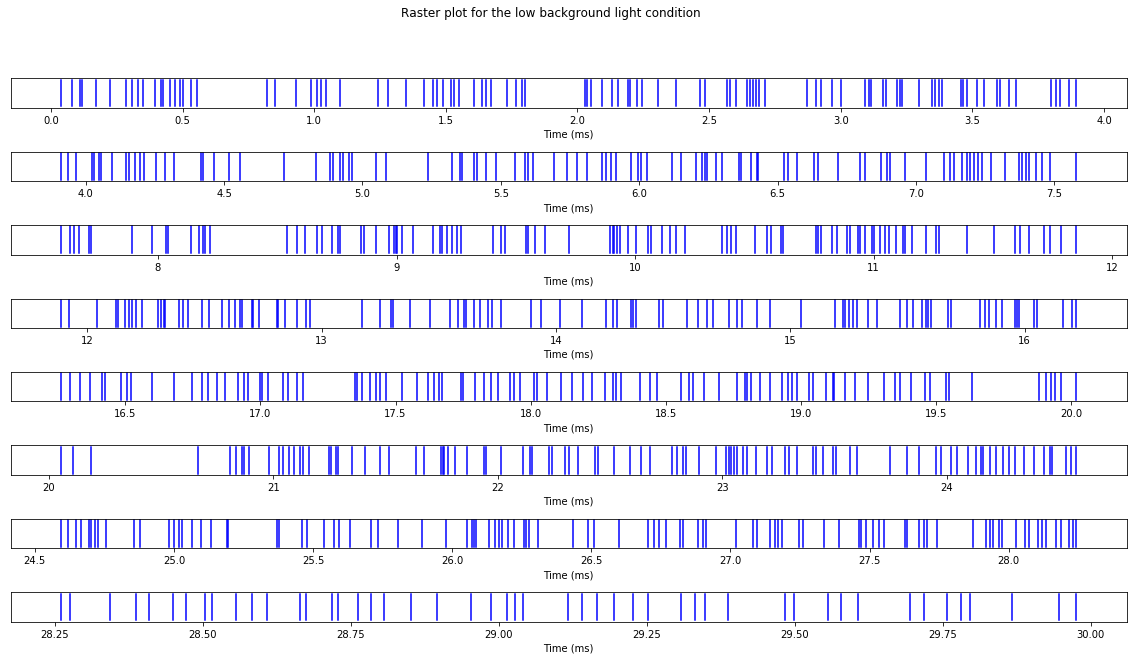

In [5]:
make_raster_plot(spike_train_low, 'Raster plot for the low background light condition')

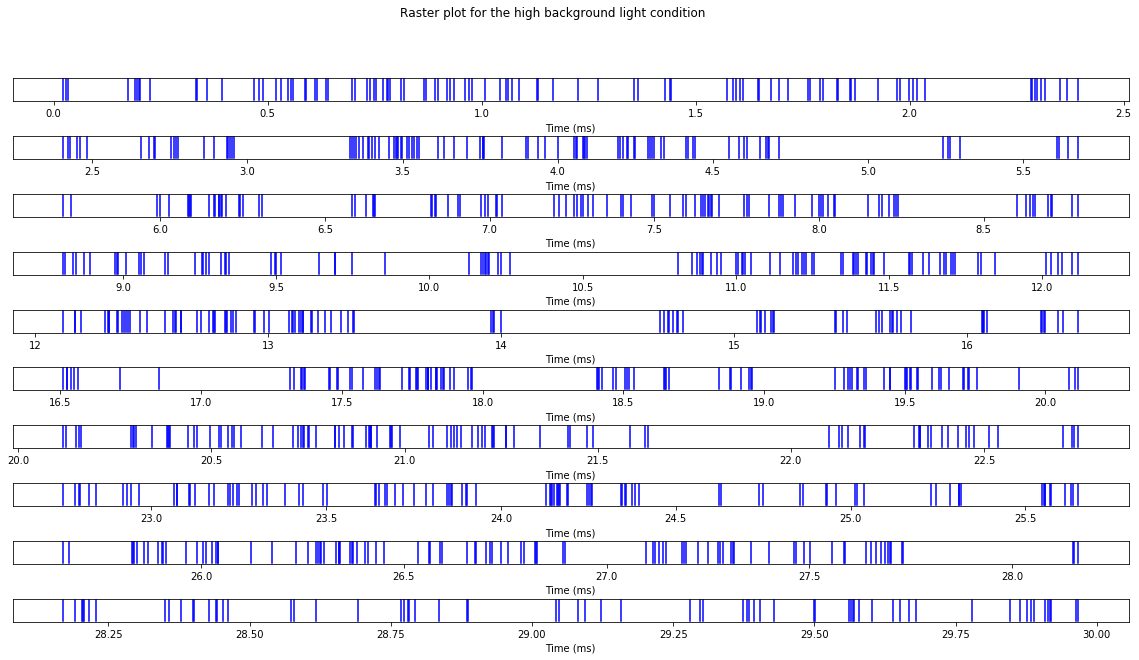

In [6]:
make_raster_plot(spike_train_high, 'Raster plot for the high background light condition')

### The interspike intervals 

One possible hypothesis worth exploring is that there is a difference in the inter-event times. That is, there are some segments where the neuron has a high firing rate, and other segments where the neuron has a lower firing rate. We can explore this by computing the inter-event times, which for neural data are called the interspike intervals. 

In order to compare the inter-event times between the low ambient light condition and the high ambient light condition, we first need to compute the inter-spike intervals. The inter-spike intervals are the waiting times between the spike times. 

**Write a function that takes as input the list of spike times and returns as output the amount of time between each of the spike times**

In [7]:
def compute_inter_spike_intervals(spike_times):
    ISIs = [spike_times[i] - spike_times[i-1] for i in range(1,len(spike_times))]
    return ISIs

Run the following code segment to visualize the empirical distribution of interspike times for each of the light conditions. What do these histograms suggest? 

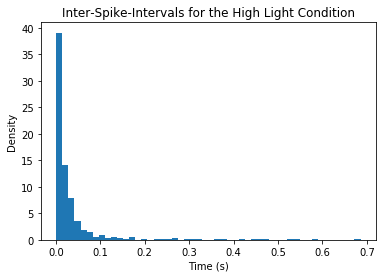

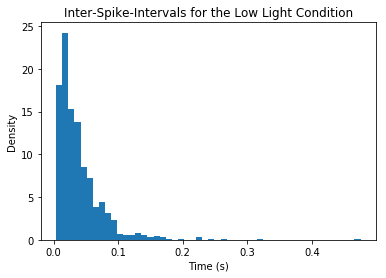

In [8]:
spike_trains_high = retinal_ganglion_data_dict['SpikesHigh']
spike_trains_low  = retinal_ganglion_data_dict['SpikesLow']
n_bins = 50
plot_title1 = 'Inter-Spike-Intervals for the High Light Condition'
plot_title2 = 'Inter-Spike-Intervals for the Low Light Condition'
high_ISIs   = compute_inter_spike_intervals(spike_trains_high)
low_ISIs    = compute_inter_spike_intervals(spike_trains_low)
plot_ISIs(high_ISIs, n_bins, plot_title1)
plot_ISIs(low_ISIs,  n_bins, plot_title2)

### Building Statistical Models of the Inter-Spike-Intervals

In order to investigate whether there is a difference in the inter-spike-intervals for the two conditions, we need a statistical model. We will investigate which of the following distributions best describes the data. We will explore the exponential, gamma, and inverse Gaussian models.   

In order to do so, we will compare the model probability density estimates to the normalized histograms of the Inter-Spike Intervals. First, we will go through an overview of these distributions

### The exponential distribution

An **exponential random variable** is a continuous random variable on the interval $[0, \infty)$ and has probability density function given by

\begin{align}
f_x(x) = P(0\leq X \leq \infty) & = \int_0^\infty \! \lambda e^{-\lambda x} \, \mathrm{d}x.  
\end{align}

Its comulative density function is given by

\begin{align}
F_x(x) = P(X \leq x) & = \int_0^x \! 1 - \lambda e^{-\lambda x} \, \mathrm{d}x.  
\end{align}

It is a useful distribution for describing waiting times that are **memoryless**, where the next waiting time can be thought of as being independent of the previous waiting times. The following functions will allow you to visualize the exponential PDF and CDF for different $\lambda$ values. Take a look at how the shape of the distribution changes for different parameters $\lambda$. This parameter is the ***rate*** parameter and must be greater than 0.

**Create a vector of different $\lambda$ parameters and an array of x values. Then, run the following line of code to visualize the PDF and the CDF for the corresponding $\lambda$ parameters.**

***Hint: the function np.linspace is useful for creating arrays within a particular range and at specific increments***


In [48]:
lambdas = [0.1, 0.5, 1, 0.2]
x_vals  = np.linspace(0,2,100)

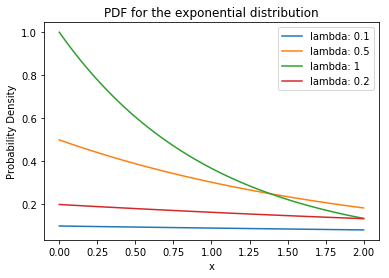

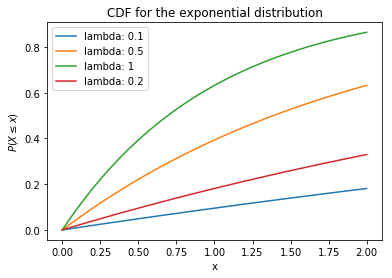

In [49]:
exponential_pdf = lambda x, lam: lam * np.exp(-x*lam)
exponential_cdf = lambda x, lam: 1 - np.exp(-x*lam)

plot_exponential_dist( exponential_pdf, x_vals, lambdas, 1) 
plot_exponential_dist( exponential_cdf, x_vals, lambdas, 0)

### The gamma distribution

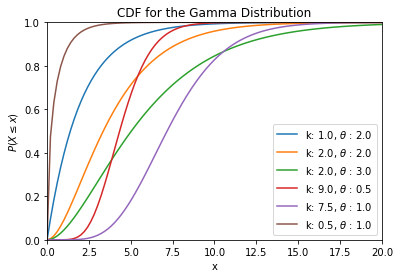

In [127]:
from scipy.special import gamma, factorial, gammainc
ks   = [1.0, 2.0, 2.0, 9.0, 7.5, 0.5]
ths  = [2.0, 2.0, 3.0, 0.5, 1.0, 1.0]
x_vals  = np.linspace(0.000001,20,100)
gamma_pdf = lambda x, th, k: ( (1/(gamma(k) * (th**k))) * (x**(k-1))) * np.exp(-x/th)
gamma_cdf = lambda x, th, k: ( gammainc(k, np.divide(x,th)) )
plot_gamma_dist(gamma_cdf, x_vals, ths, ks, 0)

### The inverse Gaussian distribution

In [ ]:
import numpy as np
x = np.random.exponential(1,(1,3000))
y = np.random.uniform(0,1,(1,100))
plt.hist(x[0],density = True)
plt.show()
exp_cdf = lambda x, lam: 1 - np.exp(-lam * x)
exp_vals = exp_cdf(y, 1)

### References
  
[1] Ginsburg, K. S., Johnsen, J. A., & Levine, M. W. (1984). Common noise in the firing of neighbouring ganglion cells in goldfish retina. The Journal of physiology, 351(1), 433-450.  
  
[2] Iyengar, S., & Liao, Q. (1997). Modeling neural activity using the generalized inverse Gaussian distribution. Biological Cybernetics, 77(4), 289-295.

  
[3] Levine, M. W. (1991). The distribution of the intervals between neural impulses in the maintained discharges of retinal ganglion cells. Biological cybernetics, 65(6), 459-467.  